In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf

In [2]:
import torch
torch.cuda.is_available()

True

### Read and Transform the data

In [3]:
data = pd.read_csv(r"D:\Capstone\Data\Train.csv")

In [4]:
data.head(5)

,ID,filename,growth_stage,damage,extent,season
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR2020
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR2021
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR2020
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR2020
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR2021


In [5]:
data.shape

(26068, 6)

In [6]:
data['year'] = data['season'].apply(lambda x: x[2:])
data['season'] = data['season'].apply(lambda x: x[0:2])
data['is_DR_damage'] = data['damage'].apply(lambda x: 'DR' if x=='DR' else 'Non-DR')

In [7]:
data.head()

,ID,filename,growth_stage,damage,extent,season,year,is_DR_damage
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR,2020,Non-DR
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR,2021,Non-DR
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR,2020,Non-DR
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR,2020,DR
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR,2021,Non-DR


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26068 entries, 0 to 26067
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            26068 non-null  object
 1   filename      26068 non-null  object
 2   growth_stage  26068 non-null  object
 3   damage        26068 non-null  object
 4   extent        26068 non-null  int64 
 5   season        26068 non-null  object
 6   year          26068 non-null  object
 7   is_DR_damage  26068 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.6+ MB


In [9]:
data[['growth_stage','damage','season','year']].astype('category').describe()

,growth_stage,damage,season,year
count,26068,26068,26068,26068
unique,4,8,2,2
top,V,G,SR,2021
freq,10015,11623,16090,17872


### Data Cleaning

In [10]:
# Drop Duplicates
data.drop_duplicates(inplace=True)

In [11]:
# Check for Missing Data
for column in data.columns:
    print(f"{column: <15}:{data[column].isnull().sum()}")

ID             :0
filename       :0
growth_stage   :0
damage         :0
extent         :0
season         :0
year           :0
is_DR_damage   :0


### Exploratory Data Analysis

In [ ]:
plt.figure(figsize=(2,3))
sns.countplot(x='is_DR_damage',data=data)
plt.ylabel("No.of Data points")
plt.show()

In [1]:
plt.figure(figsize=(5,3))
sns.histplot(x='extent',data=data, kde=True)
plt.show()

In [2]:
#plt.figure(figsize=(2,3))
sns.boxplot(x='damage',y='extent',data = data, hue='year')
plt.show()

NameError: name 'sns' is not defined

In [180]:
data_dr = data[data['damage']=='DR']
data_dr.head()

,ID,filename,growth_stage,damage,extent,season,year,is_DR_damage
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR,2020,DR
8,ID_BVNP8C4M1N,L331F04678C01S11060Rp30683.jpg,M,DR,40,LR,2021,DR
9,ID_MFL3FVUKDA,L133F00737C01S06945Rp25674.jpg,F,DR,60,LR,2021,DR
19,ID_NFYJ8T2V5W,L432F01720C01S04931Rp13768.jpg,M,DR,20,SR,2020,DR
23,ID_C74KHW4OK5,L133F03014C01S00293Rp10017.jpg,M,DR,50,SR,2020,DR


In [181]:
data_dr.shape

(4516, 8)

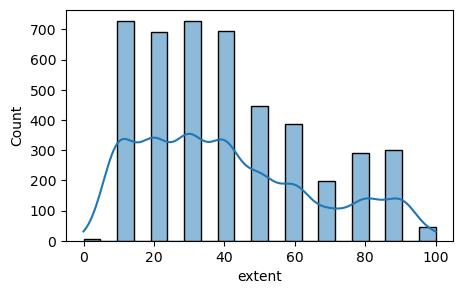

In [182]:
plt.figure(figsize=(5,3))
sns.histplot(x='extent',data=data_dr, kde=True)
plt.show()

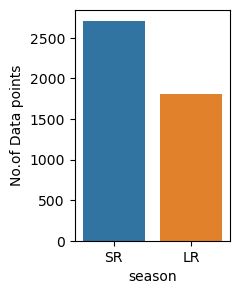

In [183]:
# Distribution of images across seasons and year

plt.figure(figsize=(2,3))
sns.countplot(x='season',data=data_dr)
plt.ylabel("No.of Data points")
plt.show()

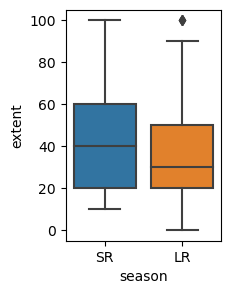

In [184]:
plt.figure(figsize=(2,3))
sns.boxplot(x='season',y='extent',data = data_dr)
plt.show()

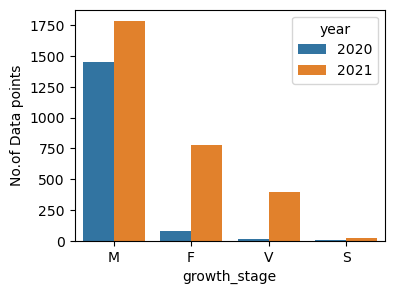

In [185]:
# Distribution of images across growth stage and year

plt.figure(figsize=(4,3))
sns.countplot(x='growth_stage',data=data_dr, hue='year')
plt.ylabel("No.of Data points")
plt.show()

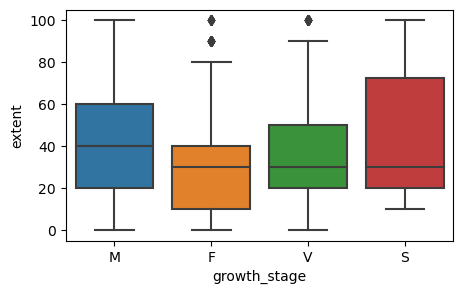

In [186]:
plt.figure(figsize=(5,3))
sns.boxplot(x='growth_stage',y='extent',data = data_dr)
plt.show()

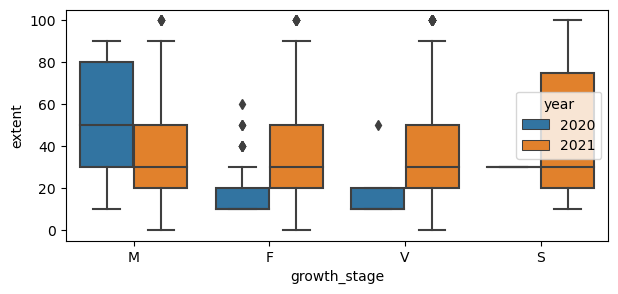

In [187]:
plt.figure(figsize=(7,3))
sns.boxplot(x='growth_stage',y='extent',data = data_dr, hue='year')
plt.show()

### Image Preprocessing

In [189]:
#Check for corrupted image

data_img = data.copy(deep=True)


data_img['is_corrupted'] = ''
data_img.head()    

,ID,filename,growth_stage,damage,extent,season,year,is_DR_damage,is_corrupted
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR,2020,Non-DR,
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR,2021,Non-DR,
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR,2020,Non-DR,
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR,2020,DR,
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR,2021,Non-DR,


In [190]:
data_img.reset_index(inplace = True)
data_img.drop('index',axis=1,inplace=True)

In [191]:
data_img.head()

,ID,filename,growth_stage,damage,extent,season,year,is_DR_damage,is_corrupted
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR,2020,Non-DR,
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR,2021,Non-DR,
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR,2020,Non-DR,
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR,2020,DR,
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR,2021,Non-DR,


In [195]:
folder_path = "D:\Capstone\Data\\train"


def isCorruptedImage(fname):
    fpath = os.path.join(folder_path, fname)
    try:
        fobj = open(fpath, "rb")
        is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
    finally:
        fobj.close()
    if not is_jfif:
        return True
    return False
            

In [196]:
isCorruptedImage('L341F00167C01S00324Rp14178.jpg')

False

In [197]:
data_img['is_corrupted'] = data_img['filename'].apply(isCorruptedImage)
data_img['is_corrupted'].sum()

0

In [144]:
# No corrupted images found

In [156]:
#Treating Imbalances in the dataset with Image Augmentation

### Without treating the imbalances

In [198]:
data.head()

,ID,filename,growth_stage,damage,extent,season,year,is_DR_damage
0,ID_1S8OOWQYCB,L427F01330C01S03961Rp02052.jpg,S,WD,0,SR,2020,Non-DR
1,ID_0MD959MIZ0,L1083F00930C39S12674Ip.jpg,V,G,0,SR,2021,Non-DR
2,ID_JRJCI4Q11V,24_initial_1_1463_1463.JPG,V,G,0,LR,2020,Non-DR
3,ID_DBO3ZGI1GM,L341F00167C01S00324Rp14178.jpg,M,DR,60,SR,2020,DR
4,ID_ORZLWTEUUS,L1084F02394C39S13931Ip.jpg,V,G,0,SR,2021,Non-DR


In [199]:
data['is_DR_damage'] = data['is_DR_damage'].astype('str')

In [205]:
num_images = data.shape[0]
print("Total no.of images: ",num_images)

Total no.of images:  26068


In [242]:
import cv2

SIZE = 256

train_images = []
train_labels = []

for i in range(num_images):
    fname = data['filename'][i]
    img_path = os.path.join(folder_path, fname)
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (SIZE, SIZE))
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    train_images.append(img)
    train_labels.append(data['is_DR_damage'][i])
    

In [233]:
import numpy as np

train_images = np.array(train_images)
train_labels = np.array(train_labels)

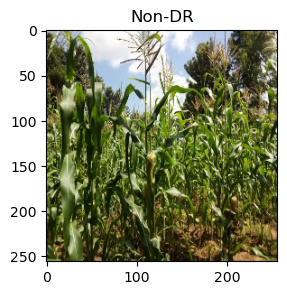

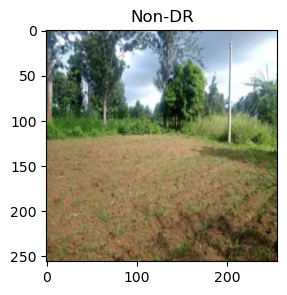

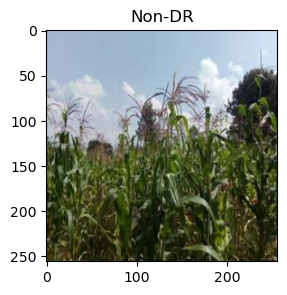

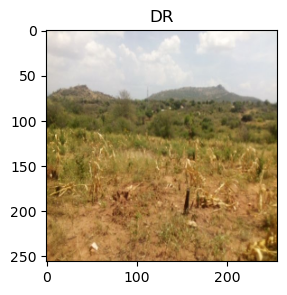

In [237]:
from random import sample

for i in sample(range(len(train_labels)), 4):
    plt.figure(figsize=(3,3))
    plt.imshow(train_images[i])
    plt.title(train_labels[i])
    plt.show()

In [238]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [241]:
from sklearn.model_selection import train_test_split

train_img, test_img, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.10, random_state=42)
train_img, val_img, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.10, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [26068, 23461]

In [ ]:
train